In [1]:
# Trying flarelist of A0 events made from make_rfl_2024.pro
# 
# 15-Nov-2024 - Started

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as io

from astropy import time
import astropy.units as u

from sunpy.time import parse_time

import warnings
warnings.simplefilter('ignore')

# The genx type doesn't work correctly?
# Doesn't like a structure? 
# from sunpy.io.special import read_genx
# So just stick with the idlsav file and the scipy reader

In [3]:
# This is the full flare list but only shutter out (A0), sflag1 = 1, and non-zero position
mfl=io.readsav('mfdata_a0gd.sav')['mfdata']
# Easier to access if convert the np.recarray to a dictionary
mfl_dict = {k : mfl[k] for k in mfl.dtype.names}

In [4]:
# Check it looks like expected....
mfl_dict

{'ID_NUMBER': array([ 2021229,  2021230,  2021213, ..., 18021001, 18022601, 18030301],
       dtype='>i4'),
 'START_TIME': array([7.29483324e+08, 7.29485344e+08, 7.29552608e+08, ...,
        1.23427103e+09, 1.23566338e+09, 1.23605306e+09], dtype='>f8'),
 'END_TIME': array([7.29483948e+08, 7.29485448e+08, 7.29553276e+08, ...,
        1.23427122e+09, 1.23566364e+09, 1.23605339e+09], dtype='>f8'),
 'PEAK_TIME': array([7.29483562e+08, 7.29485378e+08, 7.29552826e+08, ...,
        1.23427121e+09, 1.23566347e+09, 1.23605317e+09], dtype='>f8'),
 'BCK_TIME': array([array([7.29483264e+08, 7.29483324e+08], dtype='>f8'),
        array([7.29485284e+08, 7.29485344e+08], dtype='>f8'),
        array([7.29552548e+08, 7.29552608e+08], dtype='>f8'), ...,
        array([1.23427097e+09, 1.23427103e+09], dtype='>f8'),
        array([1.23566332e+09, 1.23566338e+09], dtype='>f8'),
        array([1.23605300e+09, 1.23605306e+09], dtype='>f8')], dtype=object),
 'IMAGE_TIME': array([array([7.29483324e+08, 7.29483

In [5]:
# What are all the dictionary keys in the flare list?
for k in mfl_dict.keys():
    print(k)

ID_NUMBER
START_TIME
END_TIME
PEAK_TIME
BCK_TIME
IMAGE_TIME
ENERGY_RANGE_FOUND
ENERGY_HI
PEAK_COUNTRATE
BCK_COUNTRATE
TOTAL_COUNTS
PEAK_CORRECTION
TOTAL_CORRECTION
POSITION
SPIN_AXIS
FSPOS
FILENAME
FLAGS
SEG_INDEX_MASK
EXTRA_BCK
SFLAG1
ACTIVE_REGION
GOES_CLASS
RADIAL_OFFSET
PEAK_PHFLUX
TOT_PHFLUENCE
E_PHFLUENCE
PEAK_PHFLUX_SIGMA
TOT_PHFLUENCE_SIGMA
E_PHFLUENCE_SIGMA
GOES_LEVEL_PK
ALT_ID


In [6]:
#  How many microflares in this list
print(f'Number of microflares in the list: {mfl_dict["ID_NUMBER"].size:,}')

Number of microflares in the list: 58,305


In [7]:
# Convert from sswidl time format/anytim to more python times via sunpy parse_time!
test_time=parse_time(mfl_dict['PEAK_TIME'][0], format='utime')
print(test_time)
print(test_time.iso)
print(test_time.decimalyear)

729483562.0
2002-02-12 02:19:22.000
2002.1153336504312


In [8]:
# And convert the whole array of times in one go
peak_time=parse_time(mfl_dict['PEAK_TIME'], format='utime')

In [9]:
# Find the hard event again 6111704 17-Nov-2006 05:13:38
hid=np.where(mfl_dict["ID_NUMBER"] == 6111704)
print(hid)
# Format of this odd due to list/array structure of flare list?
print(hid[0].flatten())
print(hid[0].flatten()[0])
# Check it returns the correct flare - though still as an array
print(mfl_dict["ID_NUMBER"][hid])
print(peak_time[hid].iso)

(array([25701]),)
[25701]
25701
[6111704]
['2006-11-17 05:13:38.000']


In [10]:
# Split the positions into two arrays, instead of an array of arrays
fposx=[f[0] for f in mfl_dict["POSITION"]]
fposy=[f[1] for f in mfl_dict["POSITION"]]

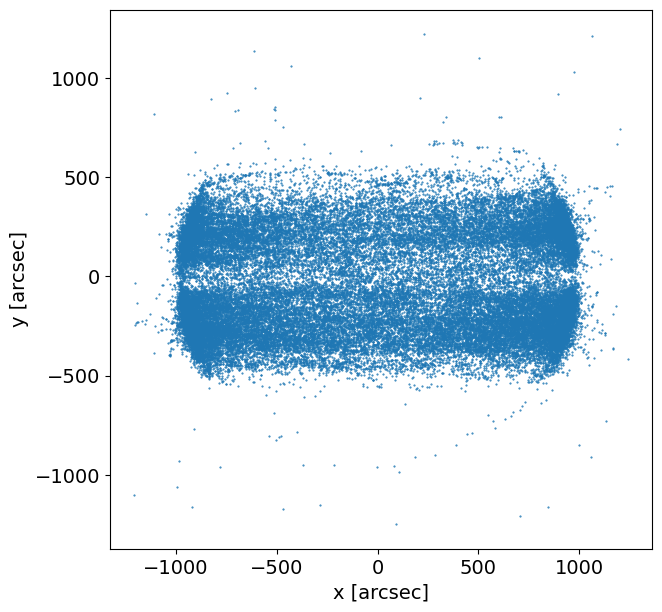

In [11]:
# Plot to check they look like expected
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(7, 7))
plt.plot(fposx,fposy,marker='.',ms=1,ls='None')
plt.xlabel('x [arcsec]')
plt.ylabel('y [arcsec]')
plt.show()

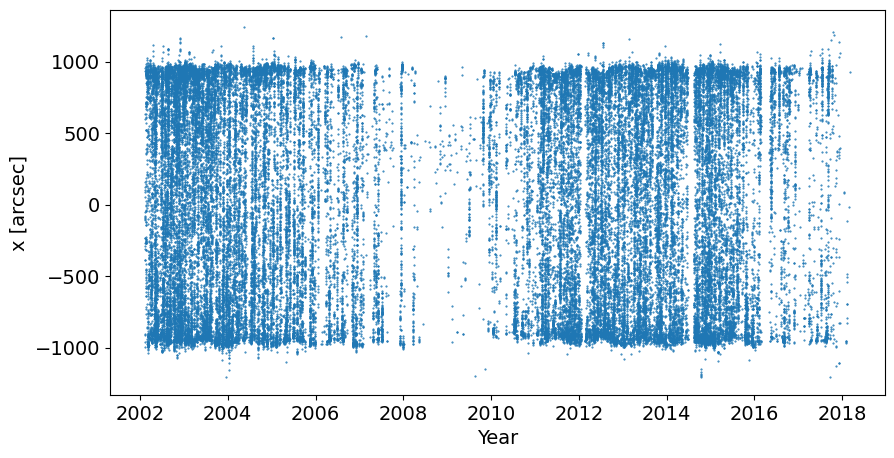

In [12]:
# Plot to check they look like expected
matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10, 5))
plt.plot(peak_time.decimalyear,fposx,marker='.',ms=1,ls='None')
plt.xlabel('Year')
plt.ylabel('x [arcsec]')
plt.show()

In [13]:
#  Maybe check one of the flags to identify the "good" events
#  From
# flag_ids = string identifiers for each data flag, e.g., fids = ['SAA_AT_START', 'SAA_AT_END', 
# 'SAA_DURING_FLARE', $ 'ECLIPSE_AT_START', 'ECLIPSE_AT_END', $ 'ECLIPSE_DURING_FLARE', $ 'FLARE_AT_SOF', 
# 'FLARE_AT_EOF', 'NON_SOLAR', $ 'FAST_RATE_MODE', 'FRONT_DECIMATION', 'ATT_STATE_AT_PEAK', $ 'DATA_GAP_AT_START', 
# 'DATA_GAP_AT_END', $ 'DATA_GAP_DURING_FLARE', $ 'PARTICLE_EVENT', 'DATA_QUALITY', $ 'POSITION_QUALITY', 
# 'ATTEN_0', 'ATTEN_1', $ 'ATTEN_2', 'ATTEN_3', 'REAR_DECIMATION', $ 'MAGNETIC_REGION', 'IMAGE_STATUS', 
# 'SPECTRUM_STATUS', $ 'SOLAR_UNCONFIRMED', 'SOLAR'].


# Check to see if any SAA flag during the flare
# Here working out saa_start + saa_end + saa_during, so if non-zero something happend to saa
saa_sum=np.array([s[0]+s[1]+s[2] for s in mfl_dict["FLAGS"]])
# Check to see if any eclipse flag during the flare
# Here working out eclp_start + eclp_end + eclp_during, so if non-zero something happend to eclipse
eclp_sum=np.array([s[3]+s[4]+s[5] for s in mfl_dict["FLAGS"]])

In [14]:
bad_saa=np.where(saa_sum > 0.0)
bad_eclp=np.where(eclp_sum > 0.0)
print(f'How many microflares with saa changes: {bad_saa[0].size:,}')
print(f'How many microflares with eclipse changes: {bad_eclp[0].size:,}')
#  That seems to be quite a few.... have I done this correctly?

# Appears so......
print(mfl_dict["FLAGS"][bad_saa[0][0]])
print(mfl_dict["FLAGS"][bad_eclp[0][0]])

How many microflares with saa changes: 9,500
How many microflares with eclipse changes: 11,477
[1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
